In [12]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd


In [31]:
image = Image.open("cat.png")
data = np.array(image)
data.shape

(733, 490, 3)

**Re-organize**

In [32]:
# convert the matrix (733, 490, 3) into (733 * 490, 3)
data = data.reshape(-1, 3)
df = pd.DataFrame(data = data)
df

,0,1,2
0,188,201,184
1,221,234,216
2,212,226,203
3,208,222,196
4,207,222,193
...,...,...,...
359165,84,65,58
359166,84,65,58
359167,87,68,61
359168,97,78,71


**Clustering**

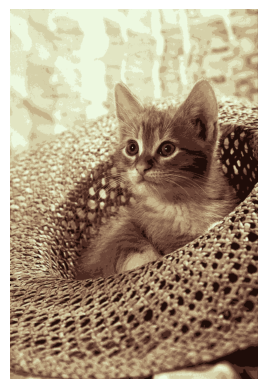

In [39]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=10, tol=0.01, random_state=0).fit(data)

comp_image = []
for i in model.labels_:
    centroid = list(model.cluster_centers_[i])
    comp_image.append(centroid)
comp_image = np.array(comp_image).reshape(733, 490, 3)
#comp_image = final.reshape(image.shape[0],image.shape[1],3)

plt.imshow(np.array(comp_image/255))
plt.axis('off')
plt.savefig('compressed.png')
plt.show()

# I can't figure out why it is so different....

**Size of original and compressed images**

In [40]:
from io import BytesIO

img_old = BytesIO()
image_old = Image.fromarray(np.uint8(image))
image_old.save(img_old, 'png')
print('Size of original image (KB): ' + str(round(img_old.tell()/1024 , 0)))

compressed = BytesIO()
image_new = Image.fromarray(np.uint8(comp_image))
image_new.save(compressed, 'png')
print('Size of compressed image (KB): ' + str(round(compressed.tell()/1024 , 0)))

Size of original image (KB): 650.0
Size of compressed image (KB): 132.0
